In [85]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [3]:
df=pd.read_csv("baseball.csv")

In [4]:
df.head(10)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [184]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [6]:
df.shape

(30, 17)

Text(0.5, 1.0, 'doubles vs triples')

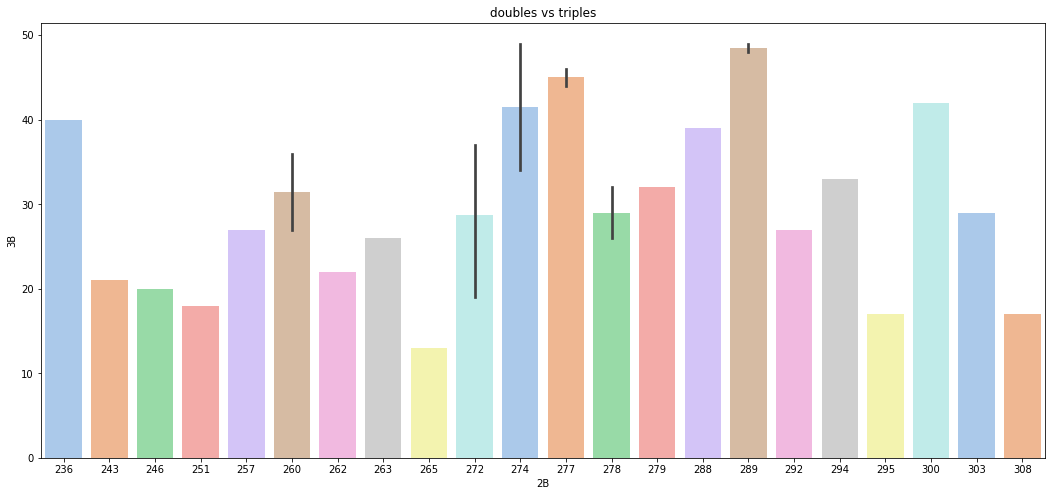

In [7]:
plt.figure(figsize = (18, 8))
sns.barplot(x = '2B', y = '3B', data = df, palette ='pastel')

plt.title('doubles vs triples')

In [8]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [9]:
df.info

<bound method DataFrame.info of       W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
0    95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2   
1    83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   
2    81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   
3    76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7   
4    74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   
5    93  891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   
6    87  764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3   
7    81  713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   
8    80  644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   
9    78  748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   
10   88  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5   
11   86  729  5459  1363  278  2

In [10]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [11]:
df.columns=("Wins","Runs", "At Bats", "Hits", "Doubles", "Triples", "Homeruns", "Walks", "Strikeouts","Stolen Bases", "Runs Allowed", "EarnedRuns", "EarnedRunAvg","CompleteGames","Shutouts", "Saves",  "Errors")

In [12]:
df.corr()

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,EarnedRuns,EarnedRunAvg,CompleteGames,Shutouts,Saves,Errors
Wins,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
Runs,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
At Bats,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
Hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
Homeruns,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
Walks,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
Strikeouts,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
Stolen Bases,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


In [13]:
dfcor=df.corr()
#earned runs is the most correlated with win

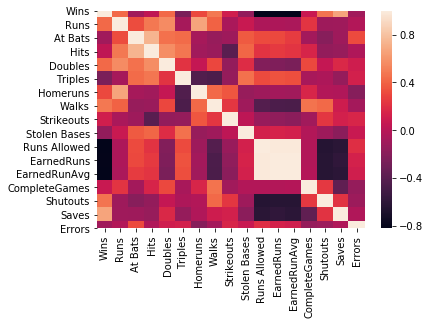

In [14]:
sns.heatmap(dfcor)


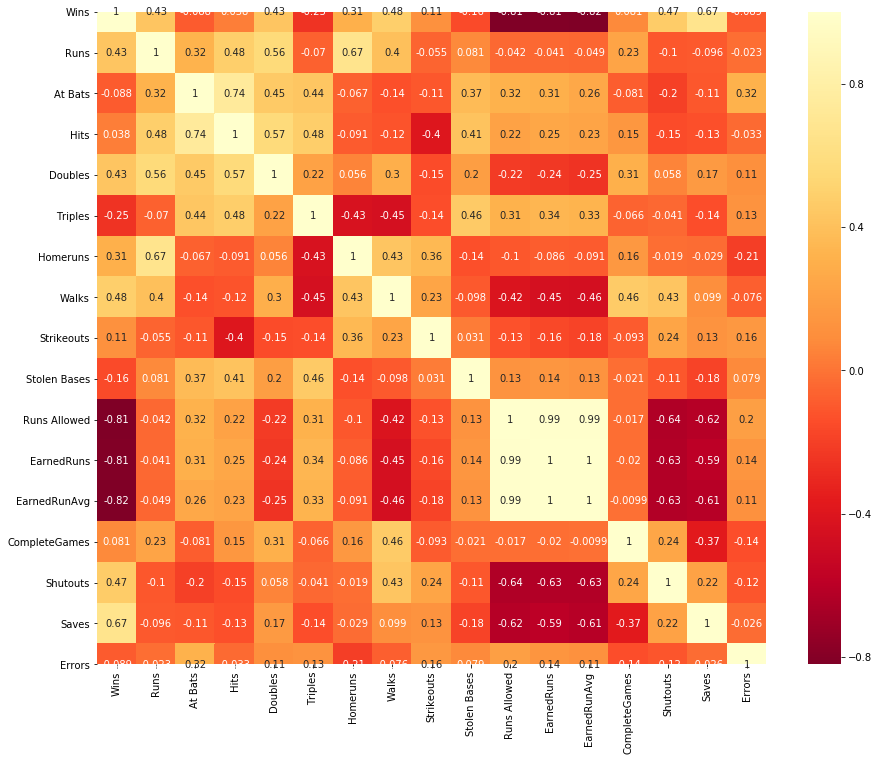

In [15]:
plt.figure(figsize=(15,12))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)
#Runs Allowed,Earned Runs,Earned Run Average (ERA) are most correlated with the output wins

In [16]:
df.isnull().sum()

Wins             0
Runs             0
At Bats          0
Hits             0
Doubles          0
Triples          0
Homeruns         0
Walks            0
Strikeouts       0
Stolen Bases     0
Runs Allowed     0
EarnedRuns       0
EarnedRunAvg     0
CompleteGames    0
Shutouts         0
Saves            0
Errors           0
dtype: int64

In [17]:
collist=df.columns.values
ncol=17
nrows=8

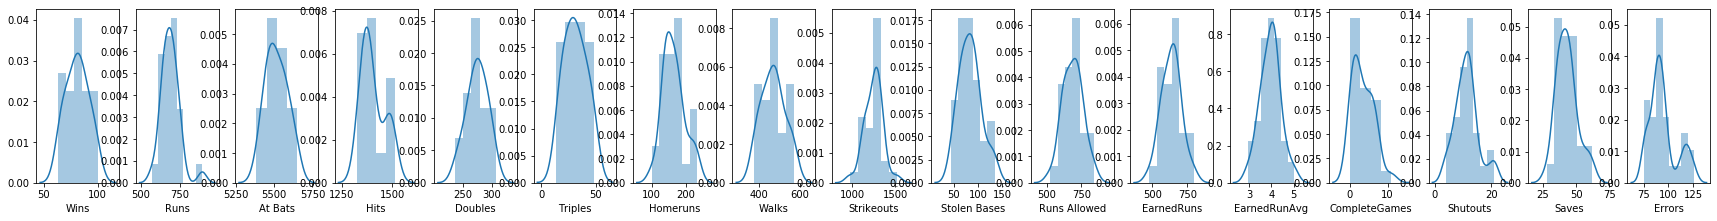

In [18]:
plt.figure(figsize=(30,30))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

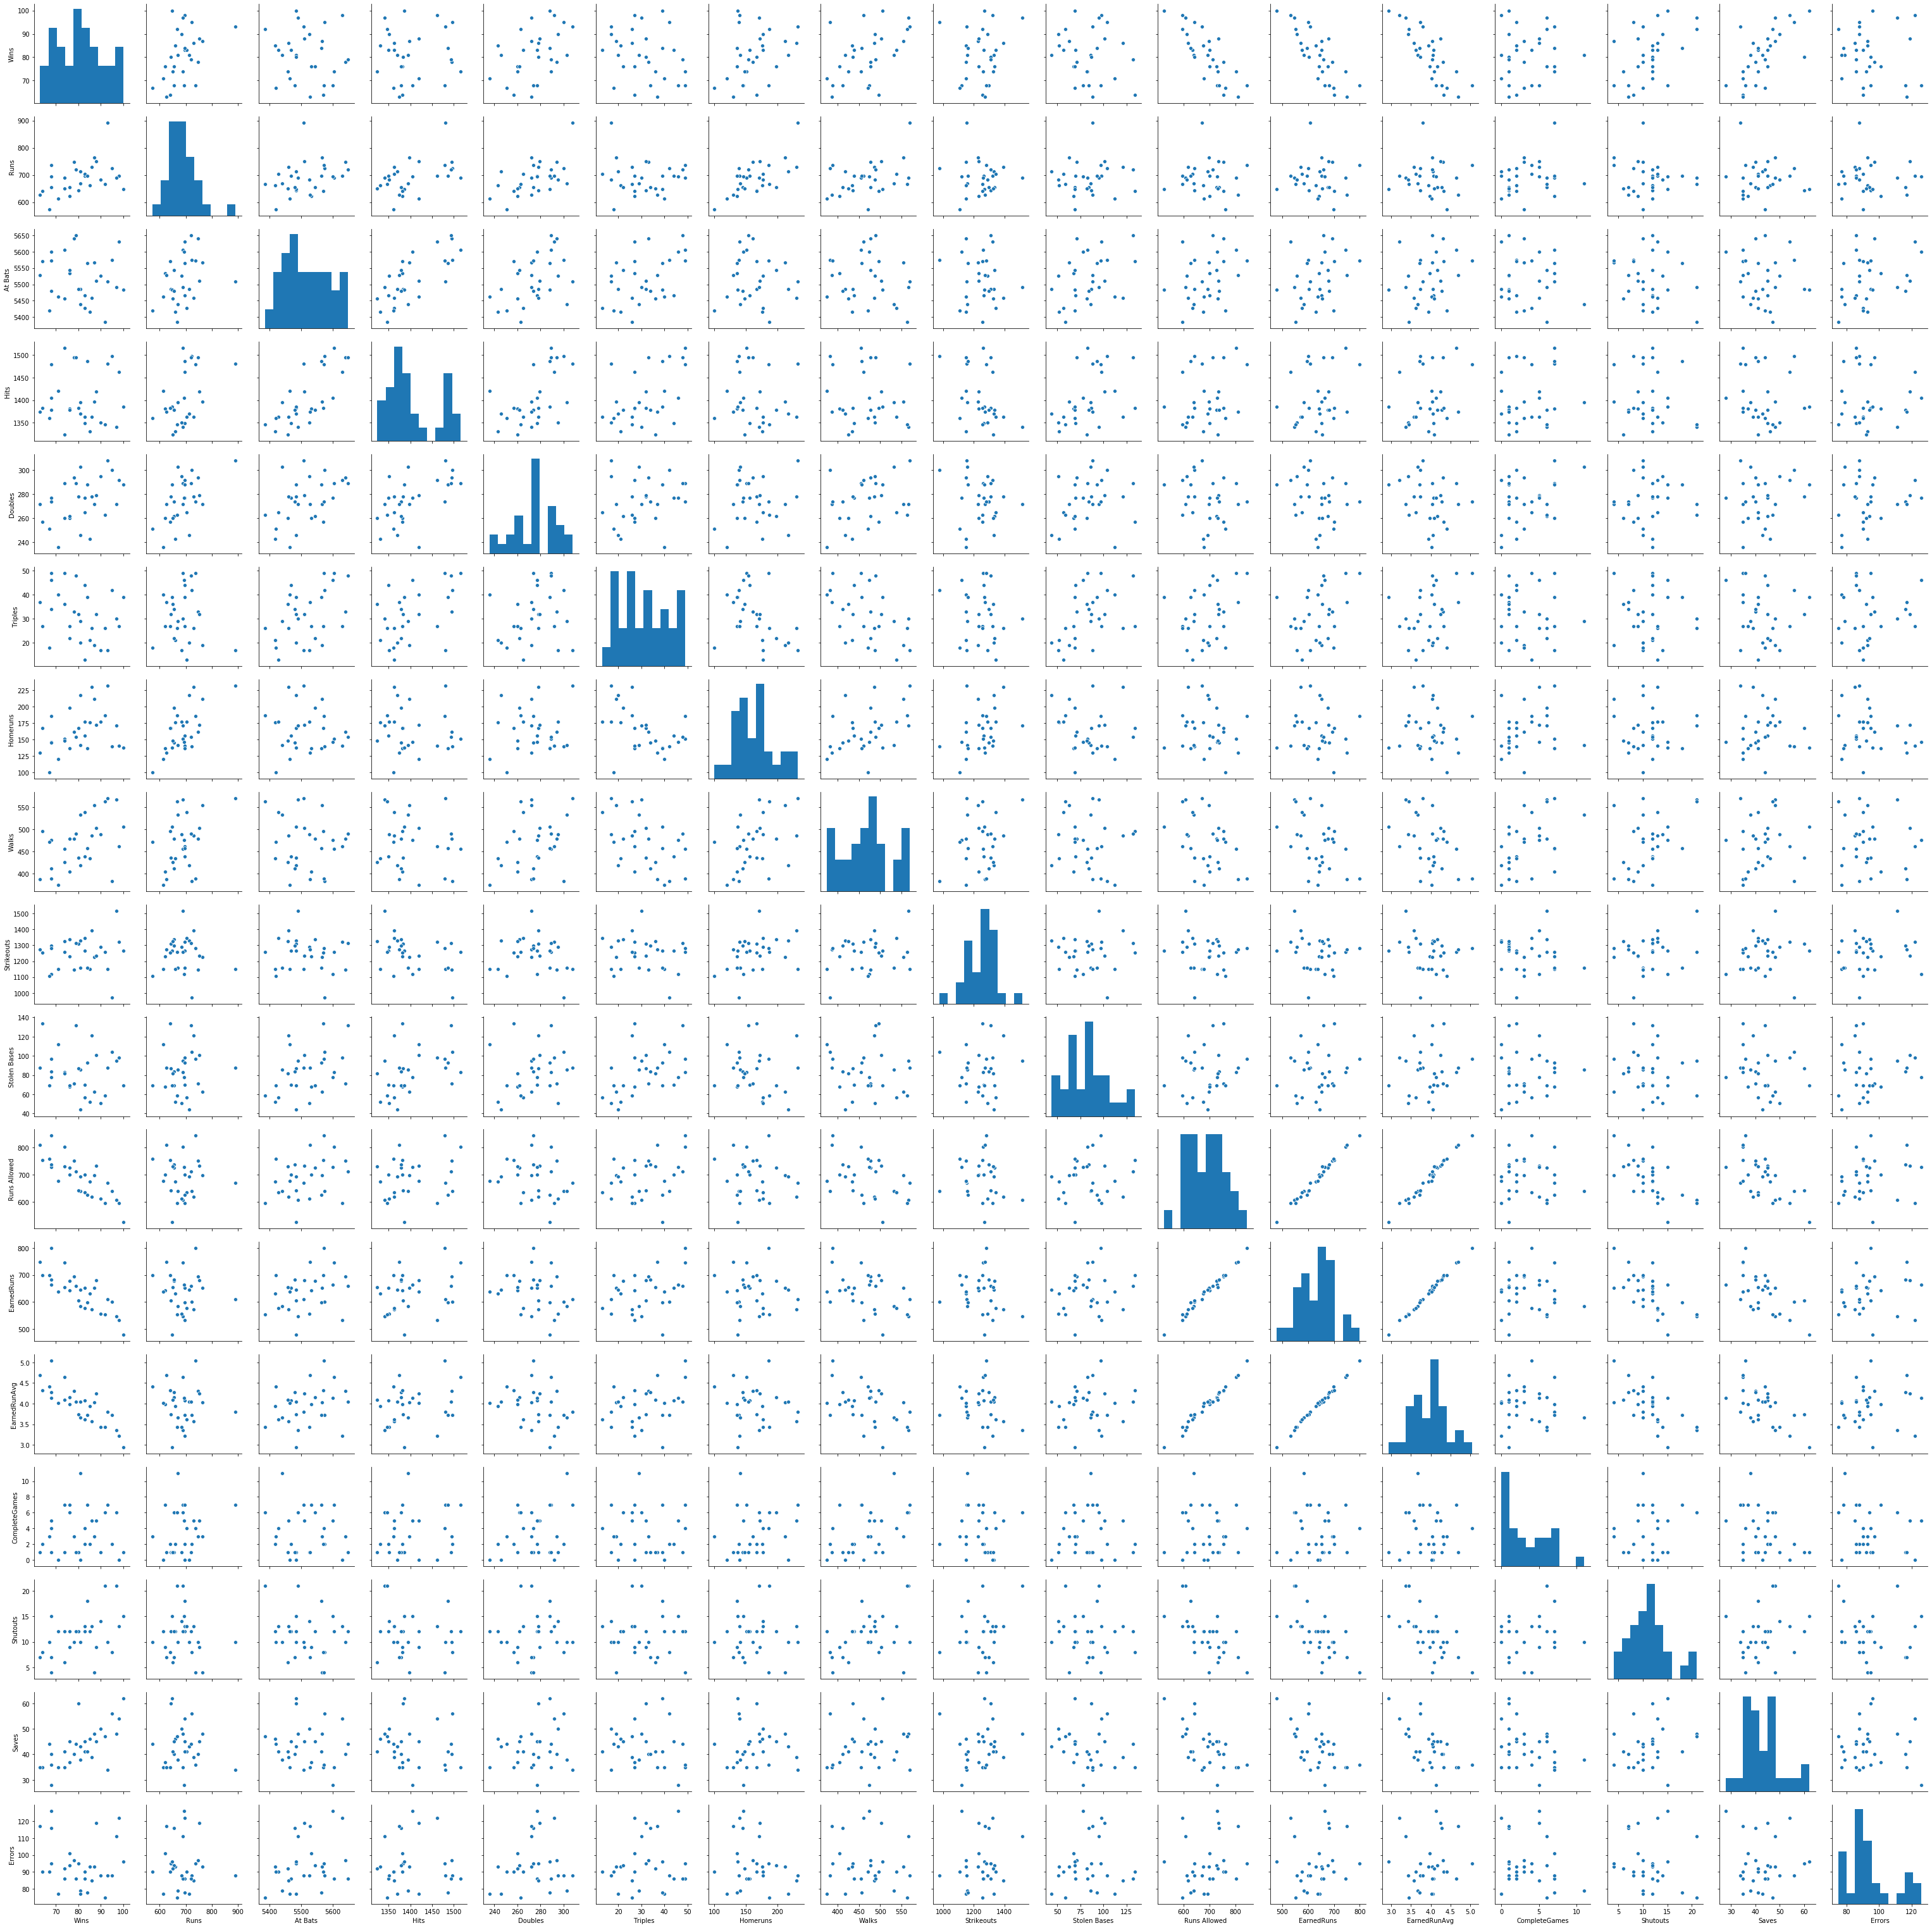

In [19]:
sns.pairplot(df)

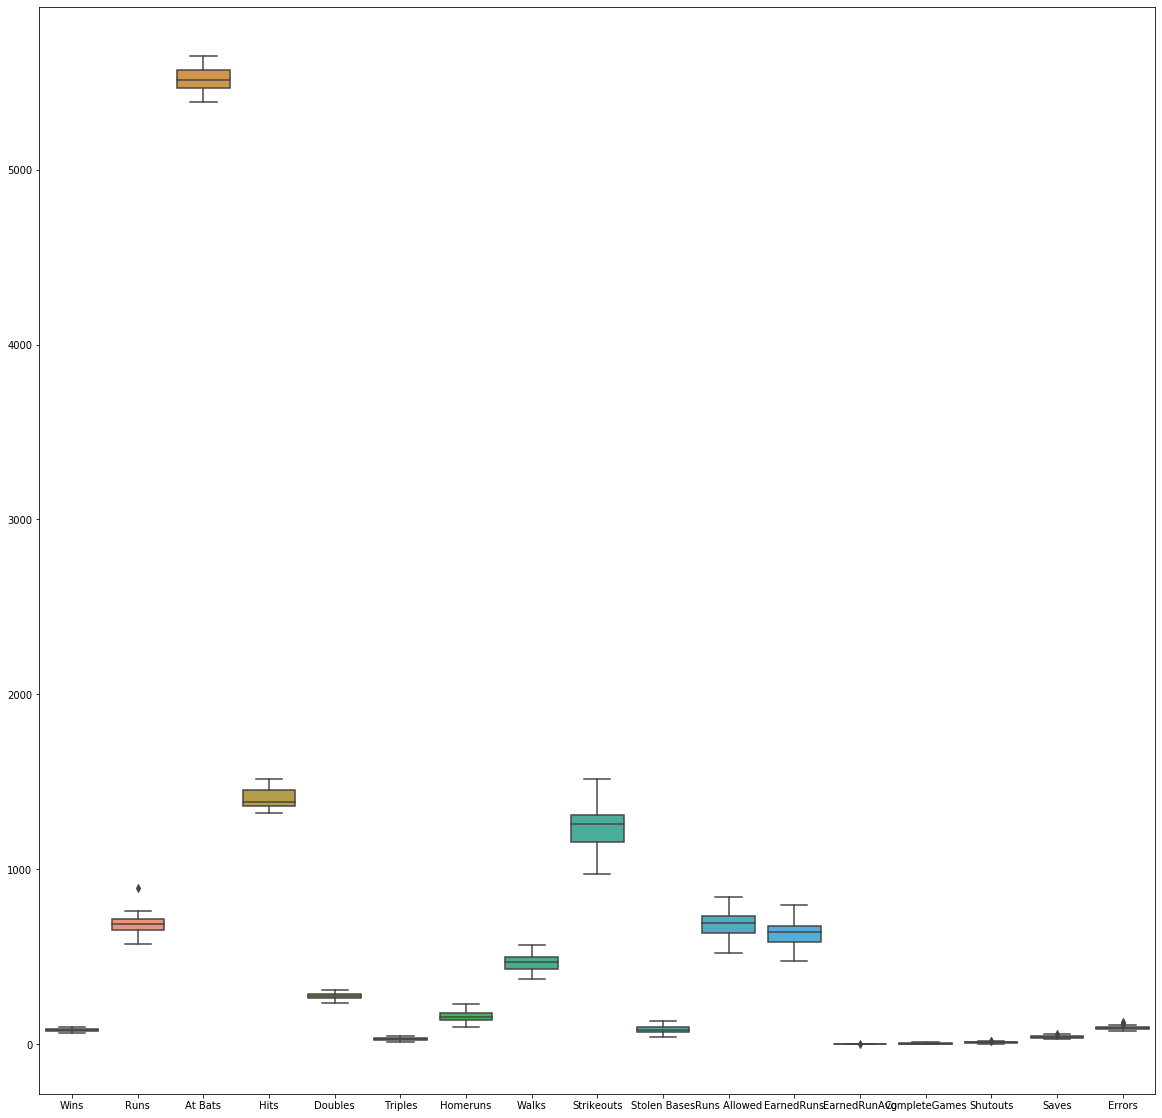

In [20]:
plt.figure(figsize = (20,20))
sns.boxplot(data=df)

In [21]:
#these five have outliers present 

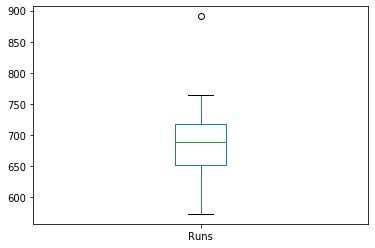

In [22]:
df['Runs'].plot.box()

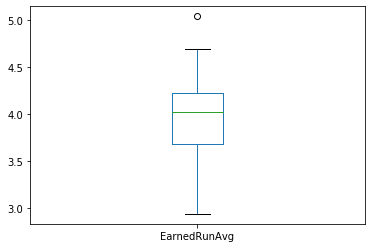

In [23]:
df['EarnedRunAvg'].plot.box()

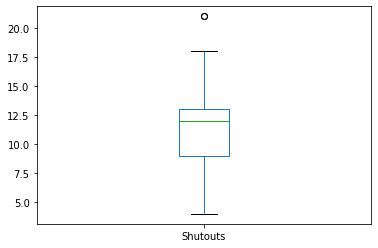

In [24]:
df['Shutouts'].plot.box()

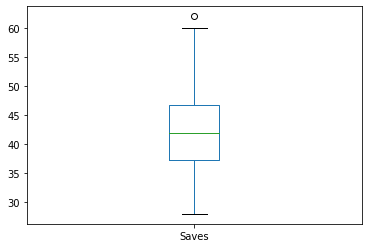

In [25]:
df['Saves'].plot.box()

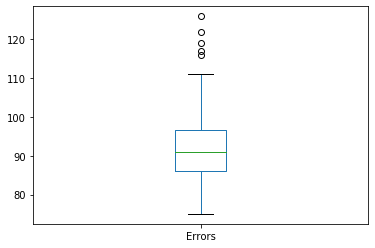

In [26]:
df['Errors'].plot.box()

In [27]:
df.loc[df['Runs']>850,'Runs']=np.mean(df['Runs'])

In [28]:
df.loc[df['EarnedRunAvg']>4.8,'EarnedRunAvg']=np.mean(df['EarnedRunAvg'])

In [29]:
df.loc[df['Shutouts']>17.5,'Shutouts']=np.mean(df['Shutouts'])

In [30]:
df.loc[df['Saves']>60,'Saves']=np.mean(df['Saves'])

In [31]:
df.loc[df['Errors']>110,'Errors']=np.mean(df['Errors'])

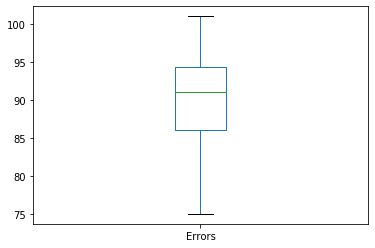

In [32]:
df['Errors'].plot.box()

In [33]:
# we have now removed the outliers

In [34]:
x=df.drop(['Wins'],axis=1)

In [35]:
y=df.iloc[:,0]

In [36]:
x.shape

(30, 16)

In [37]:
y.shape

(30,)

In [38]:
y

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: Wins, dtype: int64

In [39]:
lr=LinearRegression()

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=40)

In [41]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
lr.score(x_test,y_test)

0.39533602546690694

In [133]:
from sklearn import linear_model
from sklearn.metrics import r2_score
max_r_score=0
for r_state in range(30,300):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)        

max r2 score corresponding to  288  is  0.9160905798830221


In [160]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso()
ls.fit(x_train,y_train)
print(ls.score(x_train,y_train))


0.8714331405091623


In [159]:
from sklearn.model_selection import GridSearchCV
alphavalue={'alpha':[1,0.1,0.01,0.001,0.0001,0]}
model=Ridge()
grid=GridSearchCV(estimator=model,param_grid=alphavalue)
grid.fit(x,y)
print(grid)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
1
{'alpha': 1}


In [161]:
rd=Ridge(alpha=1)
rd.fit(x,y)
print(rd.coef_)
print(rd.score(x_test,y_test))

[ 0.0387401  -0.02878724  0.07018929 -0.05250857  0.19310317  0.07496433
  0.01427006 -0.00470805 -0.05548511  0.13140118 -0.25378881  0.33145641
  0.19496679 -0.25472137  0.45183849  0.16816584]
0.9971579129584431


In [154]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=288)

In [135]:
pred=lr.predict(x_test)
print("Predicted wins:",pred)
print("actual wins",y_test)

Predicted wins: [88.07242345 69.95926397 78.90587663 84.6603395  68.33750015 93.44174148]
actual wins 6     87
19    64
7     81
26    84
23    67
0     95
Name: Wins, dtype: int64


In [162]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.9361117479267739


In [163]:
lr.score(x_test,y_test)

0.9361117479267739

In [139]:
from sklearn.model_selection import cross_val_score
a_score=cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring="r2")
a_score

array([-6.07154982e-01, -5.73913463e+00,  9.10267117e-02,  4.15360204e-01,
       -1.04055469e+02])

In [140]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier()
rfr.fit(x_train, y_train)
rfr_predict=rfr.predict(x_test) 

In [141]:
rfr_conf_matrix = confusion_matrix(y_test, rfr_predict)
rfr_acc_score = accuracy_score(y_test, rfr_predict)
print(rfr_conf_matrix)
print(rfr_acc_score)

[[0 0 0 0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]]
0.0


In [107]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=250)
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.0
[[0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0 0 0]]
              precision    recall  f1-score   support

          63       0.00      0.00      0.00       1.0
          64       0.00      0.00      0.00       0.0
          68       0.00      0.00      0.00       1.0
          74       0.00      0.00      0.00       0.0
          78       0.00      0.00      0.00       0.0
          79       0.00      0.00      0.00       1.0
          81       0.00      0.00      0.00       1.0
          83       0.00      0.00      0.00       0.0
          85       0.00      0.00      0.00       1.0
          98       0.00      0.00      0.00       1.0

    accuracy                           0.00       6.0
   macro avg       0.00      0.00      0.00       6.0
weighted avg       0.00      0.00      0.00       6.0



In [76]:
df.drop(['Homeruns'],axis=1,inplace=True)

In [77]:
df.drop(['Hits'],axis=1,inplace=True)

KeyError: "['Hits'] not found in axis"

In [93]:
df.drop(['Strikeouts'],axis=1,inplace=True)

In [94]:
df

,Wins,Runs,At Bats,Doubles,Triples,Walks,Stolen Bases,Runs Allowed,EarnedRuns,EarnedRunAvg,CompleteGames,Shutouts,Saves,Errors
0,95,724.000000,5575,300,42,383,104,641,601,3.730000,2,8.0,56.000000,88.000000
1,83,696.000000,5467,277,44,439,70,700,653,4.070000,2,12.0,45.000000,86.000000
2,81,669.000000,5439,303,29,533,86,640,584,3.670000,11,10.0,38.000000,79.000000
3,76,622.000000,5533,260,27,404,68,701,643,3.980000,7,9.0,37.000000,101.000000
4,74,689.000000,5605,289,49,455,83,803,746,4.640000,7,12.0,35.000000,86.000000
5,93,688.233333,5509,308,17,570,88,670,609,3.800000,7,10.0,34.000000,88.000000
6,87,764.000000,5567,272,19,554,63,698,652,4.030000,3,4.0,48.000000,93.000000
7,81,713.000000,5485,246,20,418,44,693,646,4.050000,0,10.0,43.000000,77.000000
8,80,644.000000,5485,278,32,436,87,642,604,3.740000,1,12.0,60.000000,95.000000
9,78,748.000000,5640,294,33,478,71,753,694,4.310000,3,10.0,40.000000,97.000000


In [142]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=288)

In [143]:
lr.score(x_test,y_test)

0.9361117479267739

In [165]:
dtc=DecisionTreeClassifier(criterion='gini')
score=cross_val_score(dtc,x,y,cv=3,scoring='f1_macro')
print('F1-score=',score)
print('Mean Scores',score.mean())
print('Standard deviation',score.std())

y_pred=cross_val_predict(dtc,x,y,cv=3)

print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

F1-score= [0.00438596 0.         0.        ]
Mean Scores 0.0014619883040935672
Standard deviation 0.0020675636876799634
Y Prediction values
[83 76 68 68 68 68 81 90 83 68 76 68 81 87 68 83 83 83 76 68 83 85 68 81
 68 83 83 76 80 68]


array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0

In [166]:
from sklearn.svm import SVC
svc=SVC(kernel="rbf")
svc.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [167]:
predsvc=svc.predict(x_test)
print('actual and predicted wins',accuracy_score(y_test,predsvc))

actual and predicted wins 0.0


In [170]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)

In [169]:
print(classification_report(y_test,predknn))

              precision    recall  f1-score   support

          64       0.00      0.00      0.00       1.0
          67       0.00      0.00      0.00       1.0
          68       0.00      0.00      0.00       0.0
          71       0.00      0.00      0.00       0.0
          76       0.00      0.00      0.00       0.0
          81       0.00      0.00      0.00       1.0
          84       0.00      0.00      0.00       1.0
          87       0.00      0.00      0.00       1.0
          95       0.00      0.00      0.00       1.0

    accuracy                           0.00       6.0
   macro avg       0.00      0.00      0.00       6.0
weighted avg       0.00      0.00      0.00       6.0



In [171]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso()
ls.fit(x_train,y_train)
print(ls.score(x_train,y_train))

0.8714331405091623


In [172]:
from sklearn.model_selection import GridSearchCV
alphavalue={'alpha':[1,0.1,0.01,0.001,0.0001,0]}
model=Ridge()
grid=GridSearchCV(estimator=model,param_grid=alphavalue)
grid.fit(x,y)
print(grid)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
1
{'alpha': 1}


In [173]:
#ridge giving a accuracy of 0.99
rd=Ridge(alpha=1)
rd.fit(x,y)
print(rd.coef_)
print(rd.score(x_test,y_test))

[ 0.0387401  -0.02878724  0.07018929 -0.05250857  0.19310317  0.07496433
  0.01427006 -0.00470805 -0.05548511  0.13140118 -0.25378881  0.33145641
  0.19496679 -0.25472137  0.45183849  0.16816584]
0.9971579129584431


In [146]:
lr.score(x_test,y_test)

0.9361117479267739

In [147]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)
kModel=kmeans.fit(df)

In [148]:
kModel.labels_

array([0, 0, 1, 0, 2, 1, 2, 0, 0, 2, 2, 1, 0, 2, 2, 1, 1, 1, 0, 2, 1, 1,
       0, 0, 2, 1, 1, 2, 0, 2])

In [149]:
kModel.cluster_centers_

array([[7.80000000e+01, 6.55100000e+02, 5.47820000e+03, 2.62500000e+02,
        3.14000000e+01, 4.19900000e+02, 7.72000000e+01, 6.95800000e+02,
        6.45000000e+02, 4.03100000e+00, 1.90000000e+00, 9.80000000e+00,
        4.47000000e+01, 8.93333333e+01],
       [9.04000000e+01, 6.86823333e+02, 5.49180000e+03, 2.85200000e+02,
        2.63000000e+01, 5.17000000e+02, 8.17000000e+01, 6.12700000e+02,
        5.60500000e+02, 3.47600000e+00, 4.80000000e+00, 1.21900000e+01,
        4.35066667e+01, 8.67666667e+01],
       [7.45000000e+01, 7.02500000e+02, 5.57880000e+03, 2.76500000e+02,
        3.62000000e+01, 4.70400000e+02, 9.16000000e+01, 7.56200000e+02,
        7.02000000e+02, 4.25363333e+00, 3.70000000e+00, 9.30000000e+00,
        3.91000000e+01, 9.24000000e+01]])

In [150]:
import pandas as pd
pd.crosstab(y,kModel.labels_)

col_0,0,1,2
Wins,,,
63,0,0,1
64,0,0,1
67,1,0,0
68,1,0,2
71,1,0,0
74,1,0,1
76,1,0,1
78,0,0,1
79,0,0,1


In [151]:
samples=df
varieties=pd.DataFrame(samples.iloc[:,0])

kmeans=KMeans(n_clusters=3)
varieties['labels']=kmeans.fit_predict(samples)
varieties['labels']+=1
pd.crosstab(varieties.iloc[:,0],varieties['labels'])

labels,1,2,3
Wins,,,
63,1,0,0
64,1,0,0
67,0,0,1
68,2,0,1
71,0,0,1
74,1,0,1
76,1,0,1
78,1,0,0
79,1,0,0


In [152]:
samples = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/0a4a1b7c052ef7e81e77604796cc3429b1763db7/baseball.csv", sep=',',header=None)
print(samples)
samples.shape
varieties=pd.DataFrame(samples.iloc[:,0])
print(varieties)
kmeans=KMeans(n_clusters=3)


     0    1     2     3    4   5    6    7     8    9    10   11    12  13  \
0     W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG   
1    95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2   
2    83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   
3    81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   
4    76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7   
5    74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   
6    93  891  5509  1480  308  17  232  570  1151   88  670  609   3.8   7   
7    87  764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3   
8    81  713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   
9    80  644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   
10   78  748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   
11   88  751  5511  1419  279  32  172  503  1233  101  733  680

In [ ]:
#ridge and cross val

In [179]:
ridge_cv_score = cross_val_score(rd, x, y, cv=3)

In [180]:
ridge_cv_score

array([-2.2688544 ,  0.46642049,  0.32428413])

In [182]:
rd.score(x_test,y_test)

0.9971579129584431

In [ ]:
#training testing dataset giving us same accuracy so no underfitting or overfitting

In [181]:
from sklearn.model_selection import cross_val_score
a_score=cross_val_score(linear_model.LinearRegression(),x,y,cv=3,scoring="r2")
a_score

array([ -3.27262044,   0.4606583 , -92.3909746 ])

In [183]:
from sklearn.externals import joblib
joblib.dump(rd,'rdbaseball.obj')
rd_from_joblib=joblib.load('rdbaseball.obj')